In [1]:
import requests
import pandas as pd
import pymongo
import streamlit as st

In [163]:
def get_coin_daily_history(coinid, days):
    # define CoinGecko API endpoint and parameters
    url = "https://api.coingecko.com/api/v3/coins/"+coinid+"/market_chart"
    params = {
        "vs_currency": "usd",
        "days": days,
        "interval": "daily"
    }
    # fetch data from CoinGecko API and store in Pandas DataFrame
    response = requests.get(url, params=params)
    data = response.json()
    prices_df = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
    market_caps_df = pd.DataFrame(data["market_caps"], columns=["timestamp", "market_cap"])
    total_volumes_df = pd.DataFrame(data["total_volumes"], columns=["timestamp", "total_volume"])

    # merge the dataframes into one dataframe using timestamp as the key
    merged_df = pd.merge(prices_df, market_caps_df, on="timestamp")
    merged_df = pd.merge(merged_df, total_volumes_df, on="timestamp")
    merged_df = merged_df[:-1]
    return merged_df

In [164]:
data = get_coin_daily_history("bitcoin", "max")

In [171]:
data.head()

,timestamp,price,market_cap,total_volume
0,1367107200000,135.30,1.500518e+09,0.0
1,1367193600000,141.96,1.575032e+09,0.0
2,1367280000000,135.30,1.501657e+09,0.0
3,1367366400000,117.00,1.298952e+09,0.0
4,1367452800000,103.43,1.148668e+09,0.0


In [166]:
connection_string = "mongodb+srv://{username}:{password}@{cluster}/?retryWrites=true&w=majority".format(
    username=st.secrets.db_username,
    password=st.secrets.db_password,
    cluster=st.secrets.cluster_name
)

In [167]:
@st.cache_resource
def init_connection():
    connection_string = "mongodb+srv://{username}:{password}@{cluster}/?retryWrites=true&w=majority".format(
    username=st.secrets.db_username,
    password=st.secrets.db_password,
    cluster=st.secrets.cluster_name
    )
    return pymongo.MongoClient(connection_string)

In [168]:
def send_coin_daily_history_to_mongodb(data,coinid, days):
    records = data.to_dict(orient="records")
    # connect to MongoDB database and insert data
    client = init_connection()
    db = client[coinid+"_database"]
    collection_name = coinid+"_market"
    if collection_name in db.list_collection_names():
        # If the collection exists, drop it
        db[collection_name].drop()
    collection = db[coinid+"_market"]
    collection.insert_many(records)

In [172]:
send_coin_daily_history_to_mongodb(data, 'bitcoin', '')

In [105]:
bitcoin_market

,timestamp,price,market_cap,total_volume,date
0,1367107200000,135.3,1.500518e+09,0.0,2013-04-28


In [103]:
bitcoin_market['date'] = pd.to_datetime(bitcoin_market['timestamp'], unit='ms')

<AxesSubplot:xlabel='date'>

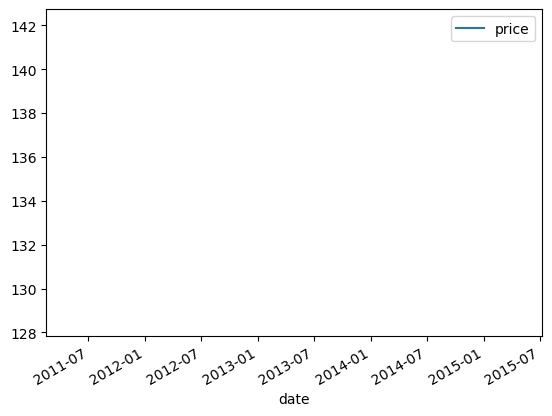

In [104]:
bitcoin_market.plot(x="date", y="price")

In [ ]:

# convert DataFrame to dictionary
records = merged_df.to_dict(orient="records")

# connect to MongoDB database and insert data
client = MongoClient("<MongoDB connection string>")
db = client["<database name>"]
collection = db["<collection name>"]
collection.insert_many(records)

In [107]:
merged_df[:-1]

,timestamp,price,market_cap,total_volume
0,1679875200000,28048.469979,5.426756e+11,1.445037e+10


In [2]:
import load_coin_history as ltc

In [3]:
import load_coin_history as ltc
ltc.coin_marketdata_to_mongodb(coinid="bitcoin", days="2")